In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Redes Neuronales Convolucionales - Convolutional Neural Networks (CNN)

*  La clave en algoritmos de aprendizaje automático es el éxito en la extracción de características. Las CNN profundas, construyen una denominadas **Jerarquía de características** combinando las de bajo nivel (Bordes, manchas, ...) con una estructura de capas para formar características de alto nivel como formas de objetos como un edificio, un coche o un perro.
*  Las CNN es un tipo de red neuronal cuyo diseño ha sido pensado para sacar provecho de algo muy evidente que se encuentra en una imagen y es su estructura espacial, lo cual no se aprovecha en una red neuronal convencional ya que la independencia de los pixeles no es algo que suceda en una imagen.
* La dependecia de un pixel de sus pixeles vecinos con los cuales surgen las estructuras, formas y patrones. Con ésto último al final vamos a saber que realmente estamos viendo o analizando en la imagen con una CNN.

* Se entiende como CNN a una red neuronal que se caracteriza por aplicar un tipo de capa en donde se realiza una convolución "jugando" con los valores numéricos asociados a cada pixel.

- Las redes neuronales convolucionales se pueden entender como una extensión a las estructuras tipo perceptrón multicapa, buscando dos propiedades cruciales para tareas de visión por computador:

    -- **Invariancia a la traslación**: un objeto puede aparecer en distintos lugares de la imagen. Por ende, se busca que en las primeras capas tipo CNN, la red debe responder de forma similar al mismo parche, sin importar en donde aparece en la imagen.

    -- **Localidad**: las primeras capas deben enfocarse en regiones locales. Se espera que estas pequeñas localidades puedan combinarse para hacer predicciones a nivel de la imagen completa.

- Para ello, las CNN restringen las conexiones de las capas densas a pequeñas regiones, parches, los cuales son operados sobre la imagen de interés.

- A la máscara que contiene los pesos se le conoce tradicionalmente como **filtro o kernel**.

## Repaso operador de convolución

- La convolución entre dos funciones $f,g:\mathbb{R}^d \to \mathbb{R}$, se define como:

$$(f * g)(\mathbf{x})=\int f(\mathbf{z})g(\mathbf{z}-\mathbf{x})d\mathbf{z}$$

en donde el operador de convolución mide el traslape en $f$ y $g$ cuando una de las dos es reflejada y desplazada por $\mathbf{x}$.

- Para el caso de funciones discretas (vectores), la integral se reemplaza por una sumatoria:

$$(f * g)(i)=\sum_{a} f(a)g(i-a)$$

- Para el caso de tensores en dos dimensiones, por ejemplo imágenes en escala de grises, tenemos que:

$$(f * g)(i,j)=\sum_{a} f(a,b)g(i-a,j-b)$$.

- La siguiente animación presenta un ejemplo de la operación de convolución para tensores en 2D en un solo canal:


![CNN](https://miro.medium.com/max/875/1*32zCSTBi3giSApz1oQV-zA.gif)



Dependiendo de los valores en el filtro obtenemos una imagen de salida a
partir de los pixel de la imagen de entrada, por tanto los valores de este filtro son los que la red irá aprendiendo poco a poco. **A las imagenes generadas al aplicar cada filtro se conoce como mapa de características o feature maps**



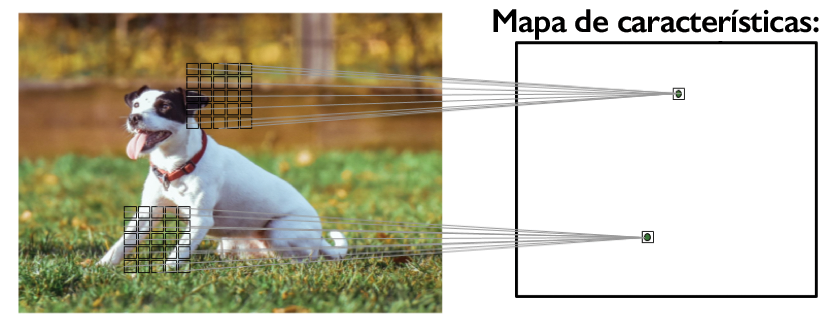

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Imagenes/15_01.png", width=700)

## Padding

Las expresiones anteriores tienen indices infinitos, lo cual es extraño porque en aplicaciones de aprendizaje automático siempre trabajamos con vectores de caracteristicas finitas, este problema se soluciona rellenando el vector o matriz con un número finito de ceros.

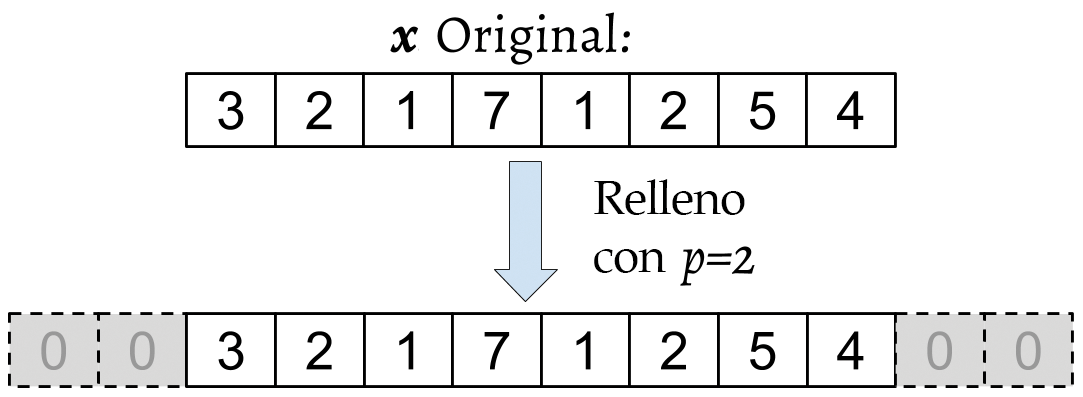

In [ ]:
Image("/content/drive/MyDrive/Imagenes/15_02.png",width=700)

## Efecto rellenado de ceros en una convolución

El relleno de ceros en convoluciones se puede aplicar para $p\geq0$. Además, el tamaño de la salida dependerá de la elección de padding que utilicemos. Existen 3 tipos de relleno: completo, igual y válido.

*   En el modo completo, el parámetro de relleno, $p$, se establece en $p = m - 1$. El relleno completo aumenta las dimensiones de la salida, por lo que rara vez se utiliza en arquitecturas CNN.
*   El mismo relleno suele utilizarse para garantizar que el vector de salida tenga el mismo tamaño que el vector de entrada. En este caso, el parámetro de relleno, $p$, se calcula en función del tamaño del filtro, junto con el tamaño del filtro, junto con el requisito de que el tamaño de entrada y el de salida sean iguales.

* Por último, el cálculo de una convolución en el modo válido se refiere al caso en el que
$p = 0$ (sin relleno).



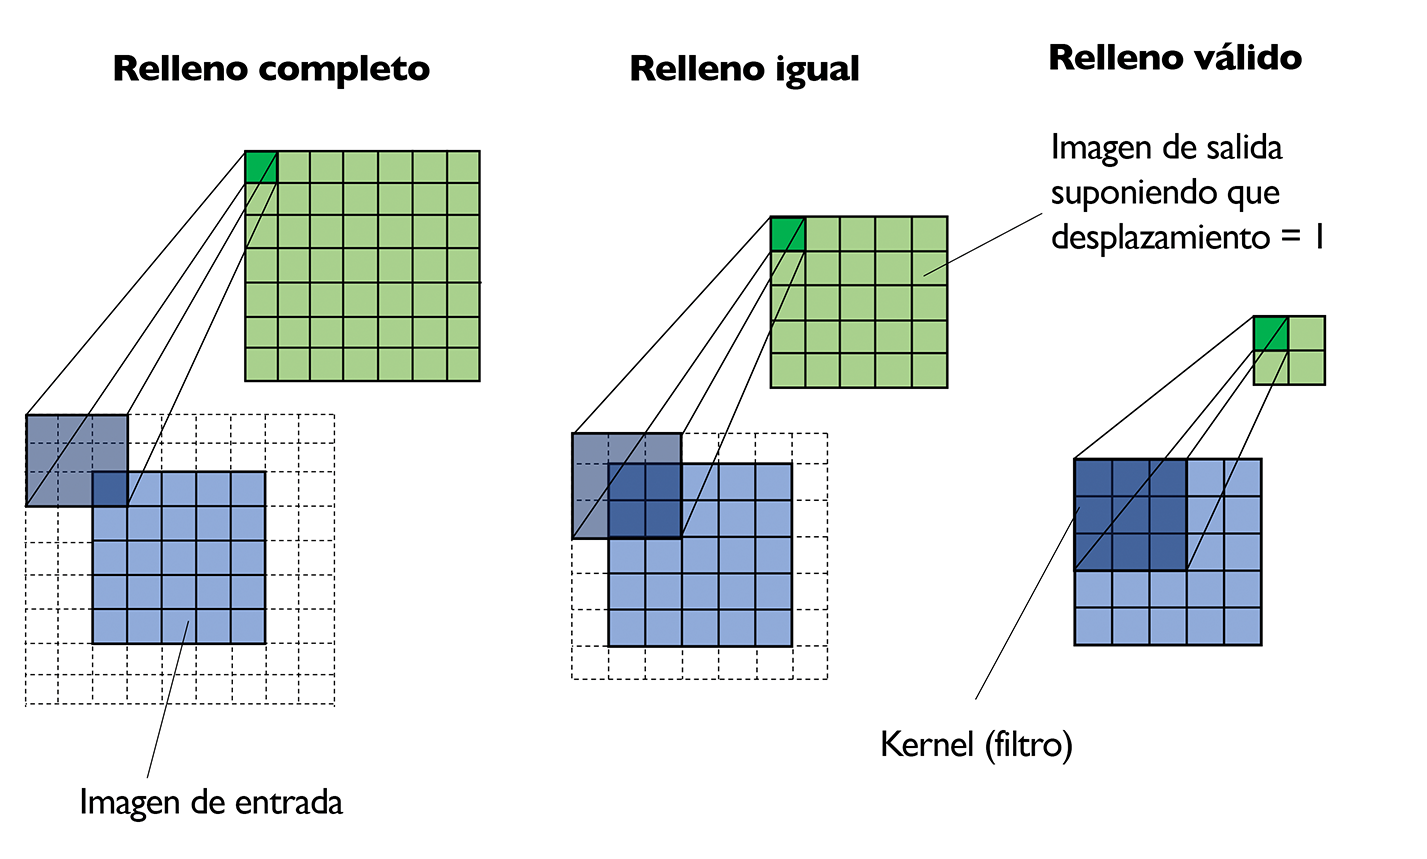

In [ ]:
Image("/content/drive/MyDrive/Imagenes/15_11.png", width=700)

Si por ejemplo tengo un filtro que identifique texturas rugosas y amarillas el mapa de caracteristicas encontrará en muchas regiones dicho patron

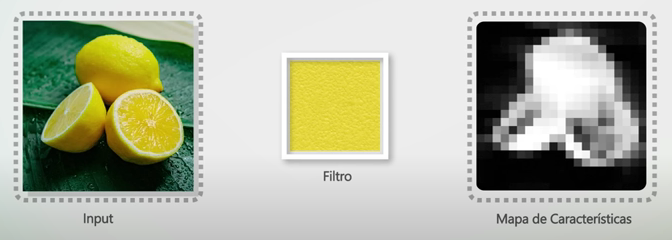

In [ ]:
Image("/content/drive/MyDrive/Imagenes/fp.png",width=700)

## Max Pooling

Su objetivo es submuestrear una imagen de entrada reduciendo su tamaño. Además, reduce el coste de cálculo reduciendo el número de parámetros que tiene que aprender y proporciona una invariancia por pequeñas translaciones (si una pequeña translación no modifica el máximo de la región barrida, el máximo de cada región seguirá siendo el mismo y por tanto la nueva matriz creada será la misma).



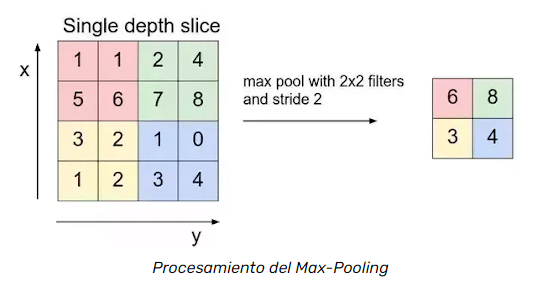

In [ ]:
Image("/content/drive/MyDrive/Imagenes/maxpooling.png",width=700)

La ventana de filtro se desplaza dos píxeles hacia la derecha (stride/paso = 2) y recupera en cada paso “el argmax” que corresponde al valor más alto de los 4 valores de píxeles.

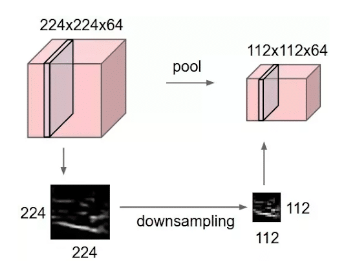

In [ ]:
Image("/content/drive/MyDrive/Imagenes/maxpooling2.png",width=400)

**Nota**:

- Generalmente en arquitecturas CNN la cantidad de filtros va aumentando a medida que ingresamos en la profundidad de la red (Secuencial).

- Se busca realizar muchas combinaciones con patrones simples de las primeras capas.

- Además, casi siempre se finaliza con un perceptrón multicapa que aprovecha las características aprendidas por las capas CNN.

# Clasificación de dígitos usando Redes Convolucionales y Keras

## El set de datos
implementaremos una red convolucional capaz de clasificar los dígitos del 0 al 9. Para ello usaremos el set de datos [MNIST](http://yann.lecun.com/exdb/mnist/), que contiene un total de 70.000 imágenes escritas a mano por diferentes personas.

Algunos ejemplos de imágenes provenientes del set MNIST

## LeNet-5

Esta red es la precursora de todas las redes convolucionales usadas en la actualidad. Fue diseñada por [Yann LeCun] a finales de los años 90, con el fin de clasificar dígitos (del 0 al 9) escritos a mano.

Esta red tiene como entradas imágenes de 28x28x1: 28 filas, 28 columnas y 1 sólo plano de color, es decir imágenes en escala de gris.


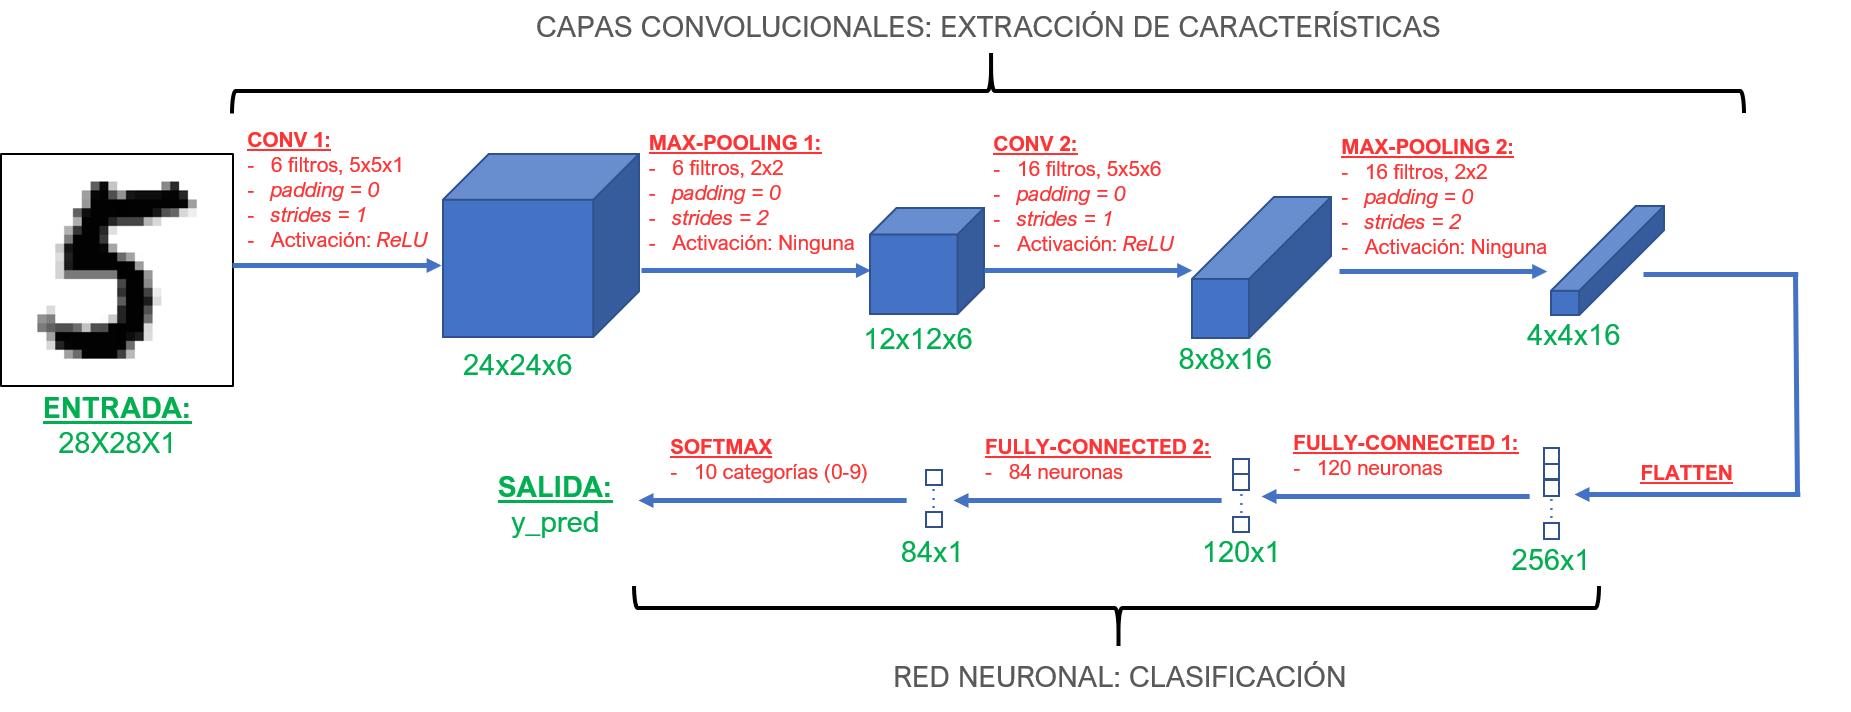

In [ ]:
Image("/content/drive/MyDrive/Imagenes/LeNet5.png",width=1000)

Como se observa en la figura de arriba, la red cuenta con dos bloques de procesamiento:
- Las *capas convolucionales* que se encargan de extraer características de las imágenes
- La *red neuronal*, que toma dichas características y permite clasificar la imagen en uno de los posibles 10 dígitos (del 0 al 9)

Además, podemos observar las siguientes características:
- Después de realizar convoluciones se usa siempre la función de activación *ReLU*
- El *max-pooling* se realiza después de las convoluciones
- Las *dimensiones espaciales* (número de filas y columnas) de las imágenes se reducen entre una capa y otra, mientras que la profundidad (correspondiente a las características extraídas) aumenta entre una capa y otra

Las redes convolucionales usadas en la actualidad implementan una lógica similar a la de LeNet-5.

##Implementación en Keras

In [ ]:
import numpy as np
from tensorflow import keras
#semilla del generador aleatorio, coeficientes de los filtros y de la Red siempre se inicialicen en el mismo valor aleatorio.
np.random.seed(2)

%matplotlib inline

import matplotlib.pyplot as plt

A continuación importamos las funciones *Sequential*, *Conv2D*, *MaxPooling2D*, *Flatten*, *Dense* y *SGD* de Keras:

In [ ]:
from keras.datasets import mnist #set de datos
from keras.utils import to_categorical #representa las etiquetas de las imagenes en formato one hot requerido para el entrenamiento y validación
from keras.models import Sequential #Creamos el contenedor del modelo
from keras.layers import Conv2D, MaxPooling2D #Capas convolucionales
from keras.layers import Flatten, Dense #Implementar la red neuronal
from keras.optimizers import SGD #metodo del gradiente descendente estocastico durante el entrenamiento

### Pre-procesamiento del set de datos

La función *mnist* de Keras permite leer el set de datos y crear automáticamente los sets de entrenamiento y validación. El primero de ellos tendrá 60,000 imágenes (cada una de 28x28) con sus correspondientes categorías, mientras que el segundo tendrá 10,000 datos:

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Los pixeles en las imágenes (tanto de entrenamiento como de validación) tienen valores entre 0 y 255; sin embargo, para garantizar la convergencia del gradiente descendente durante el entrenamiento es necesario normalizar estos valores entre 0 y 1:

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

También se deben codificar *y_train* y *y_test* en el formato *one-hot*:

In [ ]:
nclases = 10
y_train = to_categorical(y_train,nclases)
y_test = to_categorical(y_test,nclases)

Finalmente, podemos visualizar un ejemplo de imagen dentro del dataset:

(-0.5, 27.5, 27.5, -0.5)

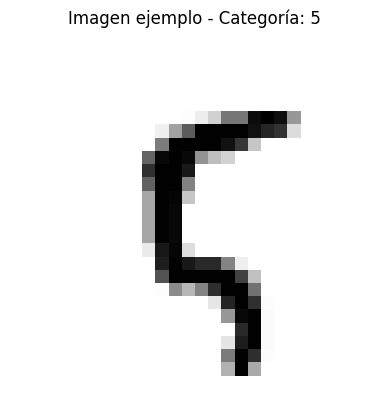

In [ ]:
nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')

Por defecto, Keras requiere cada dato de entrada en el formato nimagenes x nfilas x ncolumnas x ncanales, donde ncanales = 1 por ser imágenes en escala de gris. Se debe modificar el tamaño de *x_train* y *x_test* para cumplir con este requerimiento:

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Creación del modelo

En la siguiente tabla se resumen las características de cada capa a implementar:
    
| **Capa**          | **Características**                            |
|-------------------|------------------------------------------------|
| CONV 1            | 6 filtros, 5x5, $p$=0, $s$=1, activación: ReLU     |
| MAX-POOLING 1     | 6 filtros, 2x2, $p$=0, $s$=2, activación: Ninguna  |
| CONV 2            | 16 filtros, 5x5, $p$=0, $s$=1, activación: ReLU    |
| MAX-POOLING 2     | 16 filtros, 2x2, $p$=0, $s$=2, activación: Ninguna |
| FLATTEN           | Simplemente convierte un volumen en un vector  |
| FULLY CONNECTED 1 | 120 neuronas, activación: ReLU                 |
| FULLY CONNECTED 2 | 84 neuronas, activación: ReLU                  |
| SALIDA            | 10 categorías, activación: softmax             |

Creemos el contenedor del modelo usando *Sequential()*:

In [ ]:
modelo = Sequential()

Y añadimos, de forma secuencial, las diferentes capas de la red convolucional. En particular, usamos *Conv2D* para las capas convolucionales y *MaxPooling2D* para el *max-pooling*, junto con *Flatten* y *Dense* para la etapa de clasificación con redes neuronales y la capa de salida:

In [ ]:
# CONV1 Y MAX-POOLING1
#por defecto el padding y el strike es de 0 y 1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# CONV2 Y MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))

### Compilación del modelo

En esta etapa definimos el optimizador a usar (gradiente descendente, tasa de aprendizaje = 0.1), así como la función de error (entropía cruzada) y la métrica de desempeño (precisión) al tener 10 categorías de salida:

In [ ]:
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Entrenamiento

Realicemos el entrenamiento usando 10 iteraciones, una tasa de aprendizaje de 0.1 y un tamaño de lote (*batch_size*) de 128 imagenes para no tener problemas del almacenamiento de los datos en memoria:

In [ ]:
nepochs = 10
tam_lote = 128
history=modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 26s 53ms/step - loss: 1.2824 - accuracy: 0.6095 - val_loss: 0.3930 - val_accuracy: 0.8763
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.3219 - accuracy: 0.9017 - val_loss: 0.2349 - val_accuracy: 0.9289
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2335 - accuracy: 0.9283 - val_loss: 0.1855 - val_accuracy: 0.9427
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1878 - accuracy: 0.9425 - val_loss: 0.1649 - val_accuracy: 0.9487
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1586 - accuracy: 0.9511 - val_loss: 0.1456 - val_accuracy: 0.9566
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1393 - accuracy: 0.9567 - val_loss: 0.1254 - val_accuracy: 0.9610
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1230 - accuracy: 0.9622 - val_loss: 0.1148 - val_accuracy:

Vemos que en la última iteración, el modelo alcanza una precisión de 97.2% para el set de entrenamiento y del 96.7% para el set de validación. Esta precisión nos indica que, en promedio, de cada 100 datos, aproximadamente 3 es clasificado incorrectamente. !Nada mal!

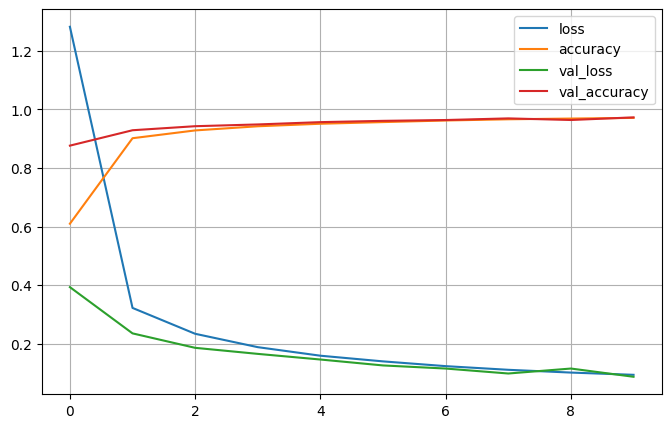

In [ ]:
import pandas as pd
#se grafica el historial del gradiente
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Desempeño del modelo

La precisión obtenida anteriormente es una medida de desempeño global de la red convolucional, pero no nos permite verificar si algunos dígitos resultan mejor clasificados que otros. Para analizar en detalle este comportamiento, podemos usar la matriz de confusión.

In [ ]:
#se predicen dos imágenes de ejemplo
X_new   = x_test[:2]
y_pred  = np.argmax(modelo.predict(X_new),axis=1) #obtiene el índice de la clase con la probabilidad más alta para cada imagen
print(y_pred,y_test[:2])

1/1 [==============================] - 0s 94ms/step
[7 2] [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.metrics import confusion_matrix

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

313/313 [==============================] - 2s 5ms/step


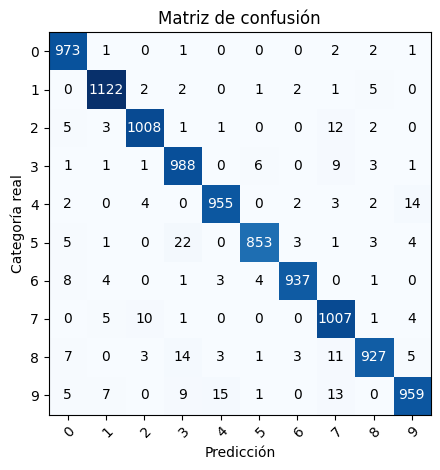

In [ ]:
y_pred = np.argmax(modelo.predict(x_test),axis=1)
y_ref = np.argmax(y_test,axis=1) #conversion de one hot a representación numerica
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)